In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
nyc_data = pd.read_csv('AB_NYC_2019.csv')

In [4]:
nyc_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
nyc_data.head(10)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   
8  5203                Cozy Clean Guest Room - Family Apt     7490   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0         John            Brooklyn          Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan             Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan              Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn        Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan         East Harlem  40.79851  -73.94399   
5        Chris           Manhattan         Murray Hill  40.74767  -73.97500   
6        Garon            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7     Shunichi           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8    MaryEllen           Manhattan     Upper West Side  40.80178  -73.96723   
9          Ben           Manhattan           Chinatown  40.71344  -73.99037   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   
6     Private room     60              45                 49  2017-10-05   
7     Private room     79               2                430  2019-06-24   
8     Private room     79               2                118  2017-07-21   
9  Entire home/apt    150               1                160  2019-06-09   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129  
6               0.40                               1                 0  
7               3.47                               1               220  
8               0.99                               1                 0  
9               1.33                               4               188

In [6]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
nyc_data.shape

(48895, 16)

In [8]:
nyc_data.describe().T

count          mean           std  \
id                              48895.0  1.901714e+07  1.098311e+07   
host_id                         48895.0  6.762001e+07  7.861097e+07   
latitude                        48895.0  4.072895e+01  5.453008e-02   
longitude                       48895.0 -7.395217e+01  4.615674e-02   
price                           48895.0  1.527207e+02  2.401542e+02   
minimum_nights                  48895.0  7.029962e+00  2.051055e+01   
number_of_reviews               48895.0  2.327447e+01  4.455058e+01   
reviews_per_month               38843.0  1.373221e+00  1.680442e+00   
calculated_host_listings_count  48895.0  7.143982e+00  3.295252e+01   
availability_365                48895.0  1.127813e+02  1.316223e+02   

                                       min           25%           50%  \
id                              2539.00000  9.471945e+06  1.967728e+07   
host_id                         2438.00000  7.822033e+06  3.079382e+07   
latitude                          40.49979  4.069010e+01  4.072307e+01   
longitude                        -74.24442 -7.398307e+01 -7.395568e+01   
price                              0.00000  6.900000e+01  1.060000e+02   
minimum_nights                     1.00000  1.000000e+00  3.000000e+00   
number_of_reviews                  0.00000  1.000000e+00  5.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  7.200000e-01   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
availability_365                   0.00000  0.000000e+00  4.500000e+01   

                                         75%           max  
id                              2.915218e+07  3.648724e+07  
host_id                         1.074344e+08  2.743213e+08  
latitude                        4.076311e+01  4.091306e+01  
longitude                      -7.393627e+01 -7.371299e+01  
price                           1.750000e+02  1.000000e+04  
minimum_nights                  5.000000e+00  1.250000e+03  
number_of_reviews               2.400000e+01  6.290000e+02  
reviews_per_month               2.020000e+00  5.850000e+01  
calculated_host_listings_count  2.000000e+00  3.270000e+02  
availability_365                2.270000e+02  3.650000e+02

In [9]:
nyc_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

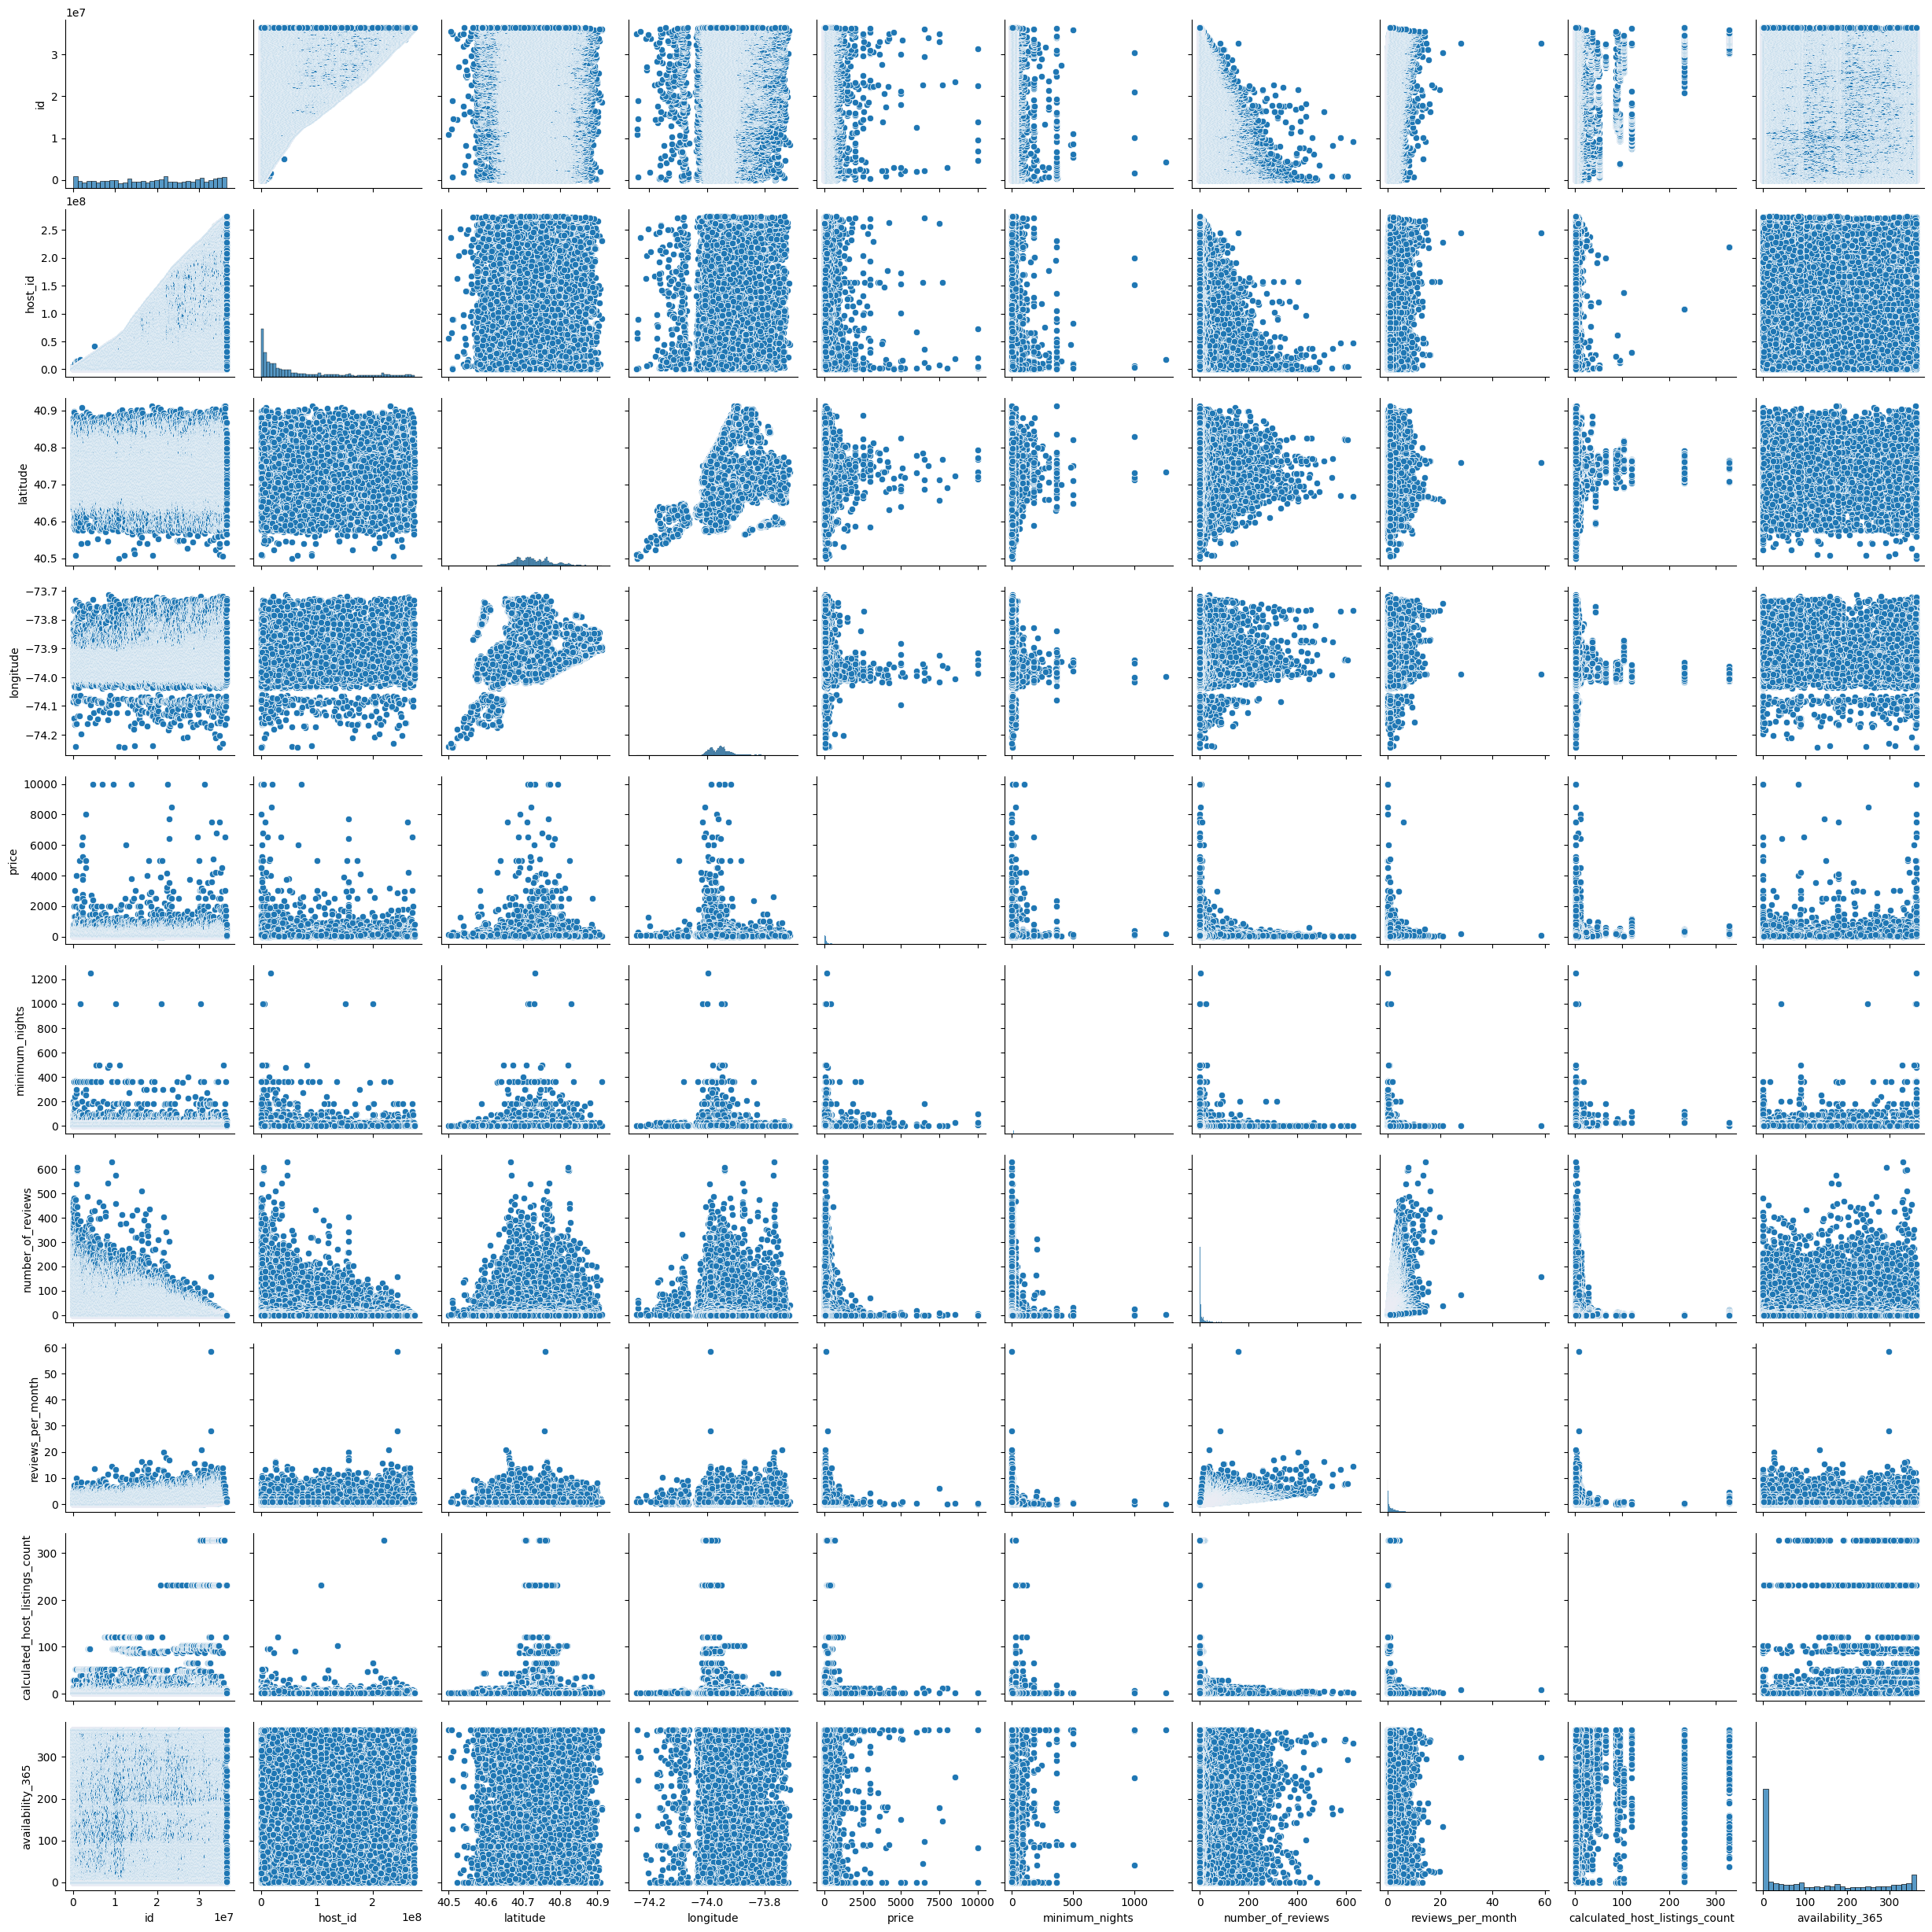

In [10]:
sns.pairplot(nyc_data)

Text(0.5, 1.0, 'Room Type vs Price')

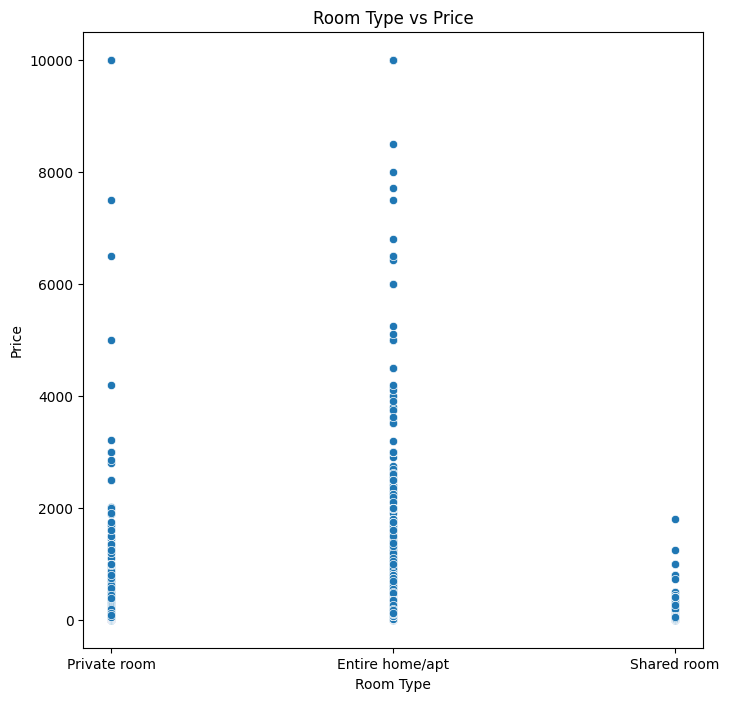

In [11]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='room_type', y='price', data=nyc_data)

plt.xlabel("Room Type")
plt.ylabel("Price")
plt.title("Room Type vs Price")

Text(0.5, 1.0, 'Room Type vs Price')

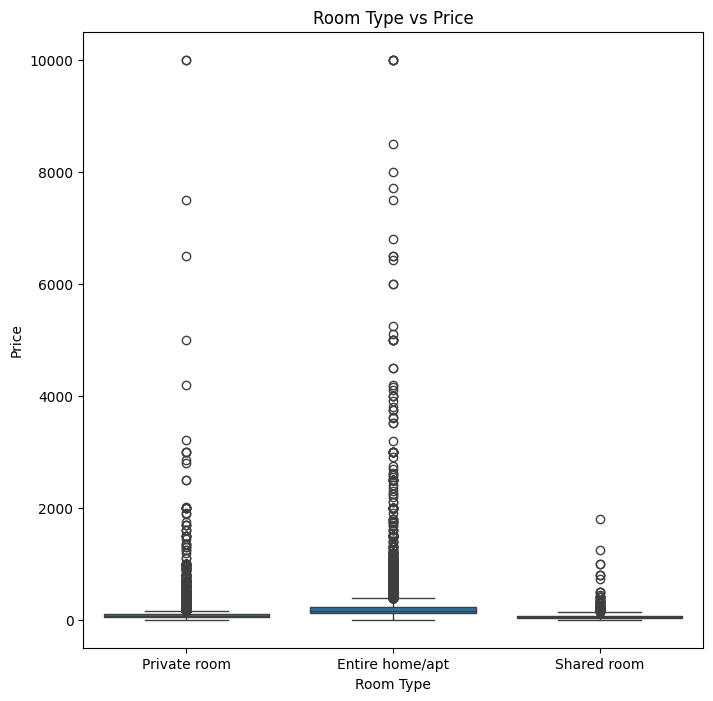

In [12]:
plt.figure(figsize=(8,8))
sns.boxplot(x='room_type', y='price', data=nyc_data)

plt.xlabel("Room Type")
plt.ylabel("Price")
plt.title("Room Type vs Price")

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

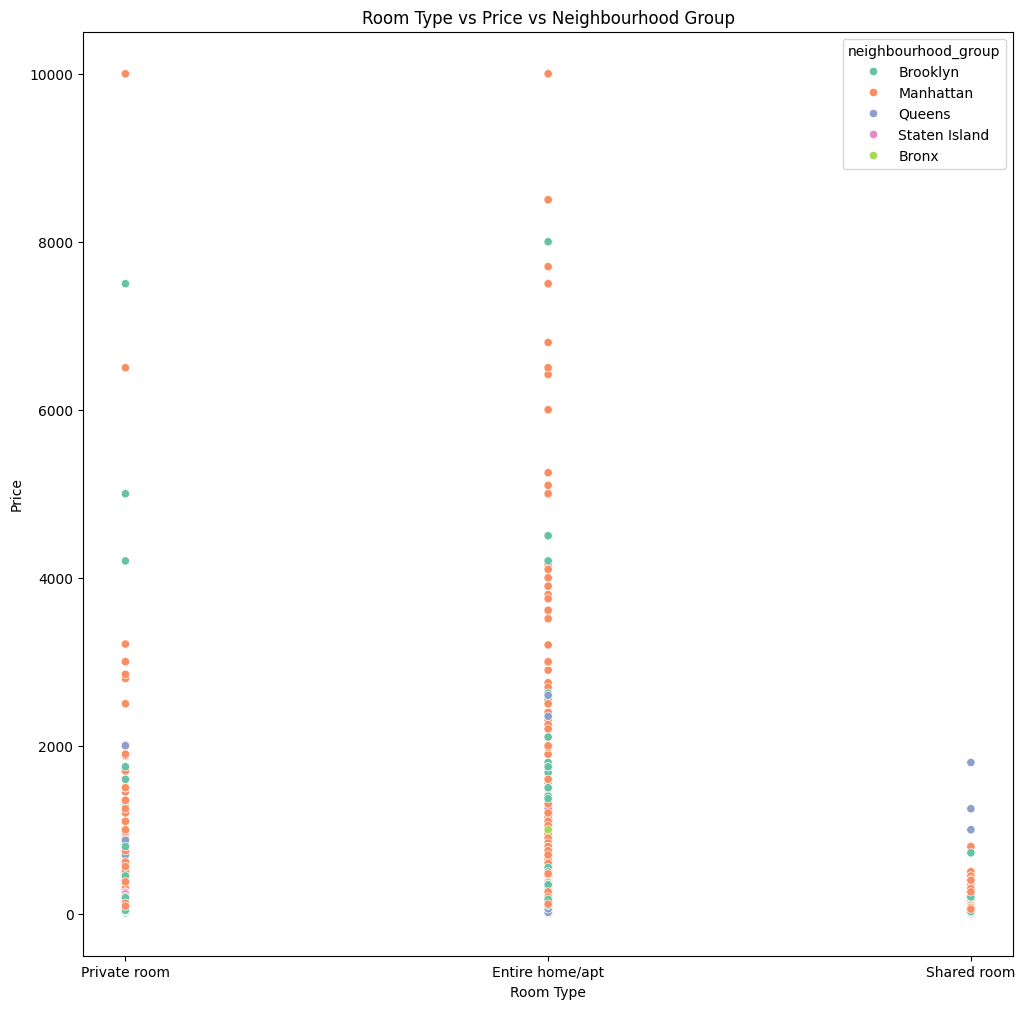

In [13]:
plt.figure(figsize=(12,12))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group",
            palette="Set2", data=nyc_data)

plt.xlabel("Room Type")
plt.ylabel("Price")
plt.title("Room Type vs Price vs Neighbourhood Group")

Text(0.5, 1.0, 'Price vs Number of Reviews vs Neighbourhood Group')

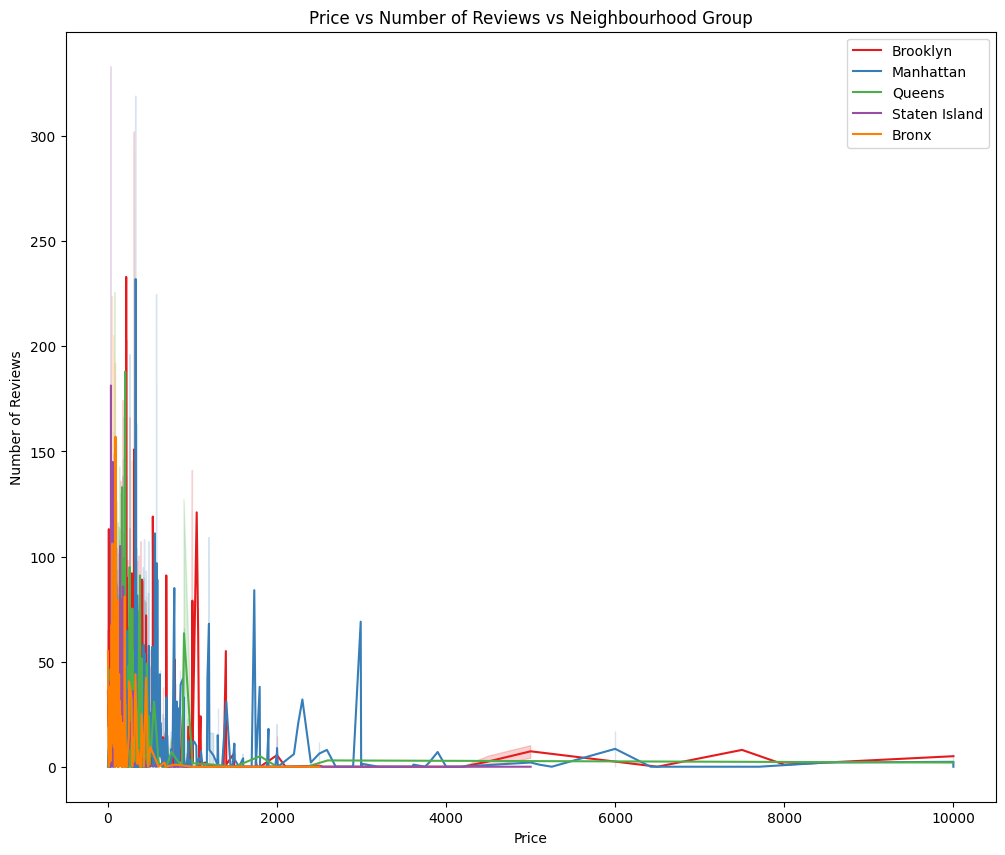

In [14]:
# graph shows price vs number of reviews based on neighborhood group.
# It shows us the lowest prices have higher reviews than the higher prices. 
# It shows negative correlation between price and number of reviews.
plt.figure(figsize=(12,10))
sns.set_palette("Set1")

sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Brooklyn'],
             label='Brooklyn')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Manhattan'],
             label='Manhattan')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Queens'],
             label='Queens')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Staten Island'],
             label='Staten Island')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Bronx'],
             label='Bronx')
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.title("Price vs Number of Reviews vs Neighbourhood Group")

In [15]:
print(nyc_data['neighbourhood'].nunique())
print(nyc_data['neighbourhood_group'].nunique())
print(nyc_data['room_type'].nunique())

221
5
3


In [16]:
Le = LabelEncoder()
nyc_data['neighbourhood_group']= Le.fit_transform(nyc_data['neighbourhood_group'])
nyc_data['neighbourhood'] = Le.fit_transform(nyc_data['neighbourhood'])
nyc_data['room_type'] = Le.fit_transform(nyc_data['room_type'])
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  int32  
 5   neighbourhood                   48895 non-null  int32  
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  int32  
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Text(0.5, 1.0, 'Price Distribution Plot')

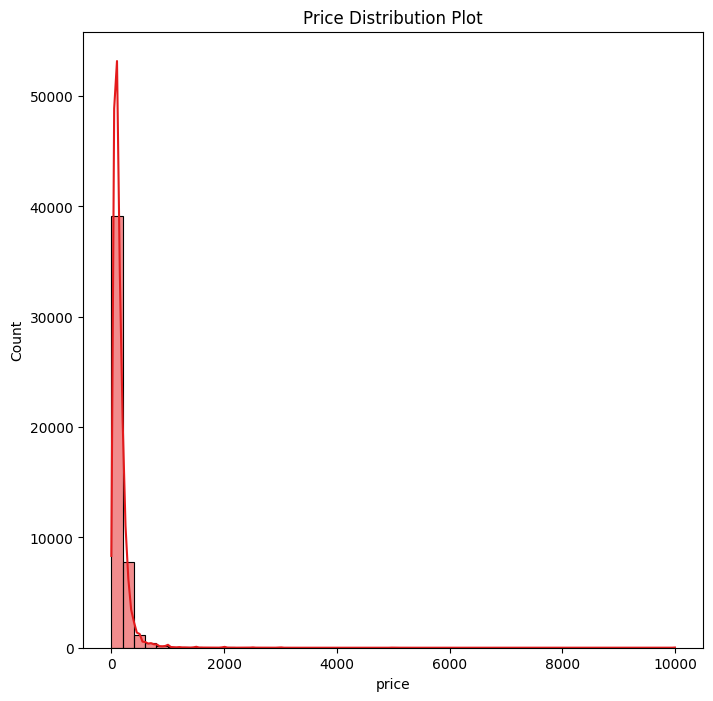

In [17]:
plt.figure(figsize=(8,8))
sns.histplot(nyc_data['price'], kde= True, bins=50)
plt.title("Price Distribution Plot")

In [18]:
# we use boxcox method to coorect right skewed data
nyc_data['price_boxcox'], lambda_ = stats.boxcox(nyc_data['price'] + 1)  # Shift to avoid zero values


Text(0.5, 1.0, 'Box cox Distribution Plot')

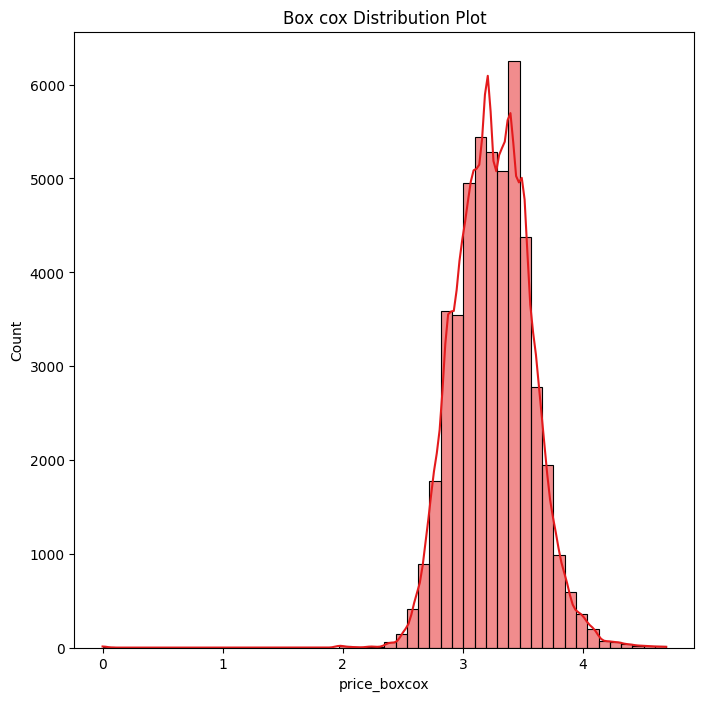

In [19]:
plt.figure(figsize=(8,8))
sns.histplot(nyc_data['price_boxcox'], kde= True, bins=50)
plt.title("Box cox Distribution Plot")

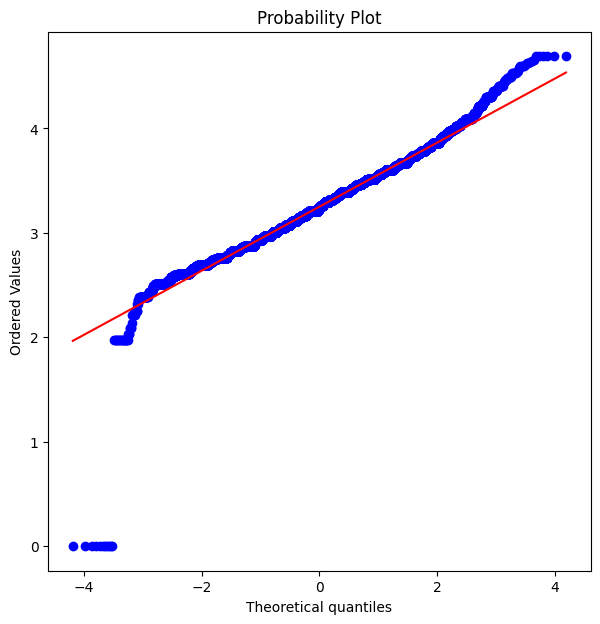

In [20]:
plt.figure(figsize=(7,7))
stats.probplot(nyc_data['price_boxcox'], plot=plt)
plt.show()

In [21]:
nyc_model = nyc_data.drop(columns=['name','id' ,'host_id','host_name', 'last_review','price'])
nyc_model.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_boxcox                          0
dtype: int64

3.13018853561771


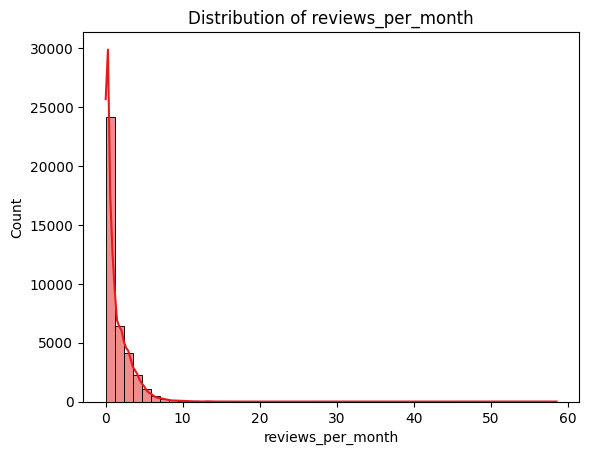

In [22]:
# now we check how the review per month feature is? 
print(nyc_data['reviews_per_month'].skew())

sns.histplot(nyc_data['reviews_per_month'], bins=50, kde=True)
plt.title("Distribution of reviews_per_month")
plt.show()


In [23]:
# as our data is rightly skewed its better to fill with median values
nyc_model['reviews_per_month'] = nyc_model['reviews_per_month'].fillna(nyc_model['reviews_per_month'].median())
nyc_model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_boxcox                      0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

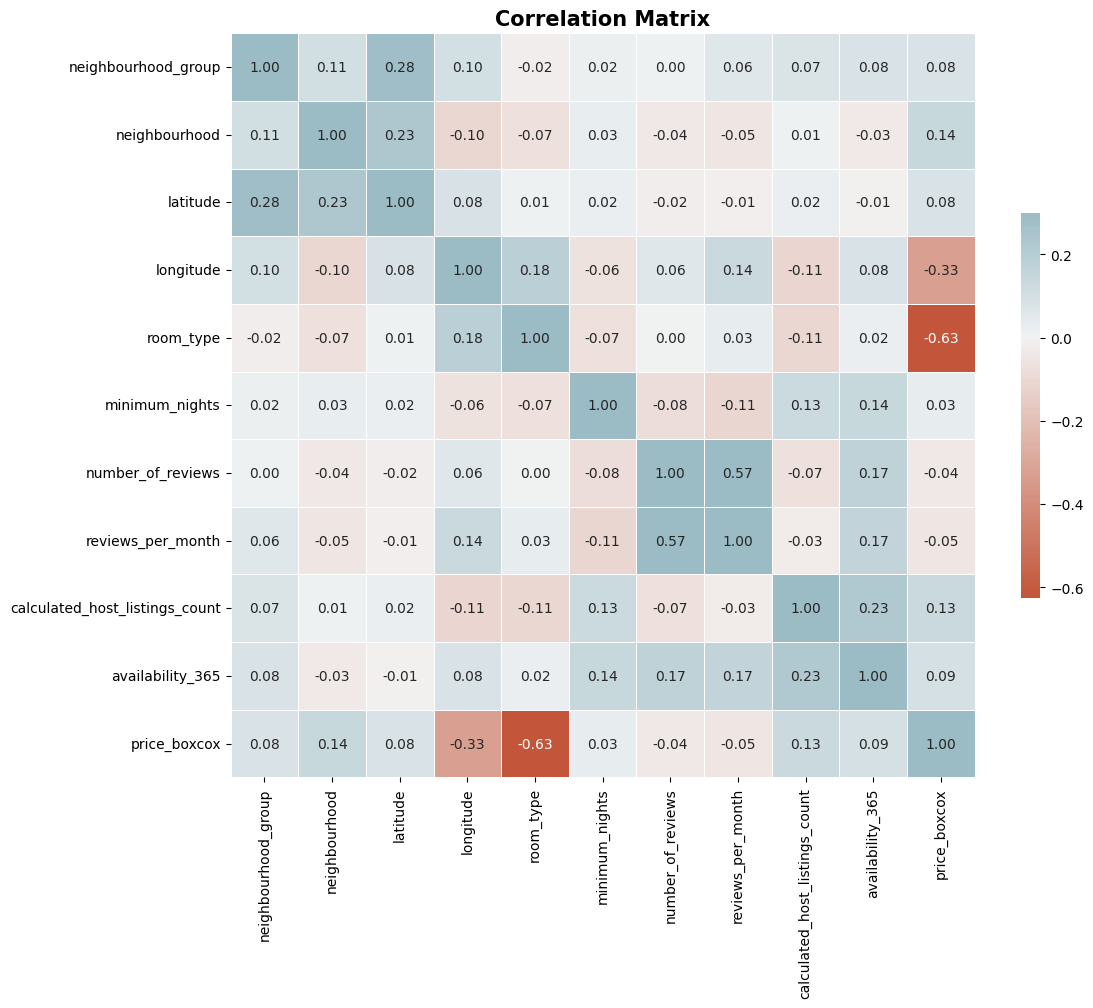

In [24]:
# we will plot the correlation heatmap to see the correlation among various features
plt.figure(figsize=(12,10))
palette = sns.diverging_palette(20, 220, n=256)
corr=nyc_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [25]:
nyc_model_x, nyc_model_y = nyc_model.iloc[:,:-1], nyc_model.iloc[:,-1]

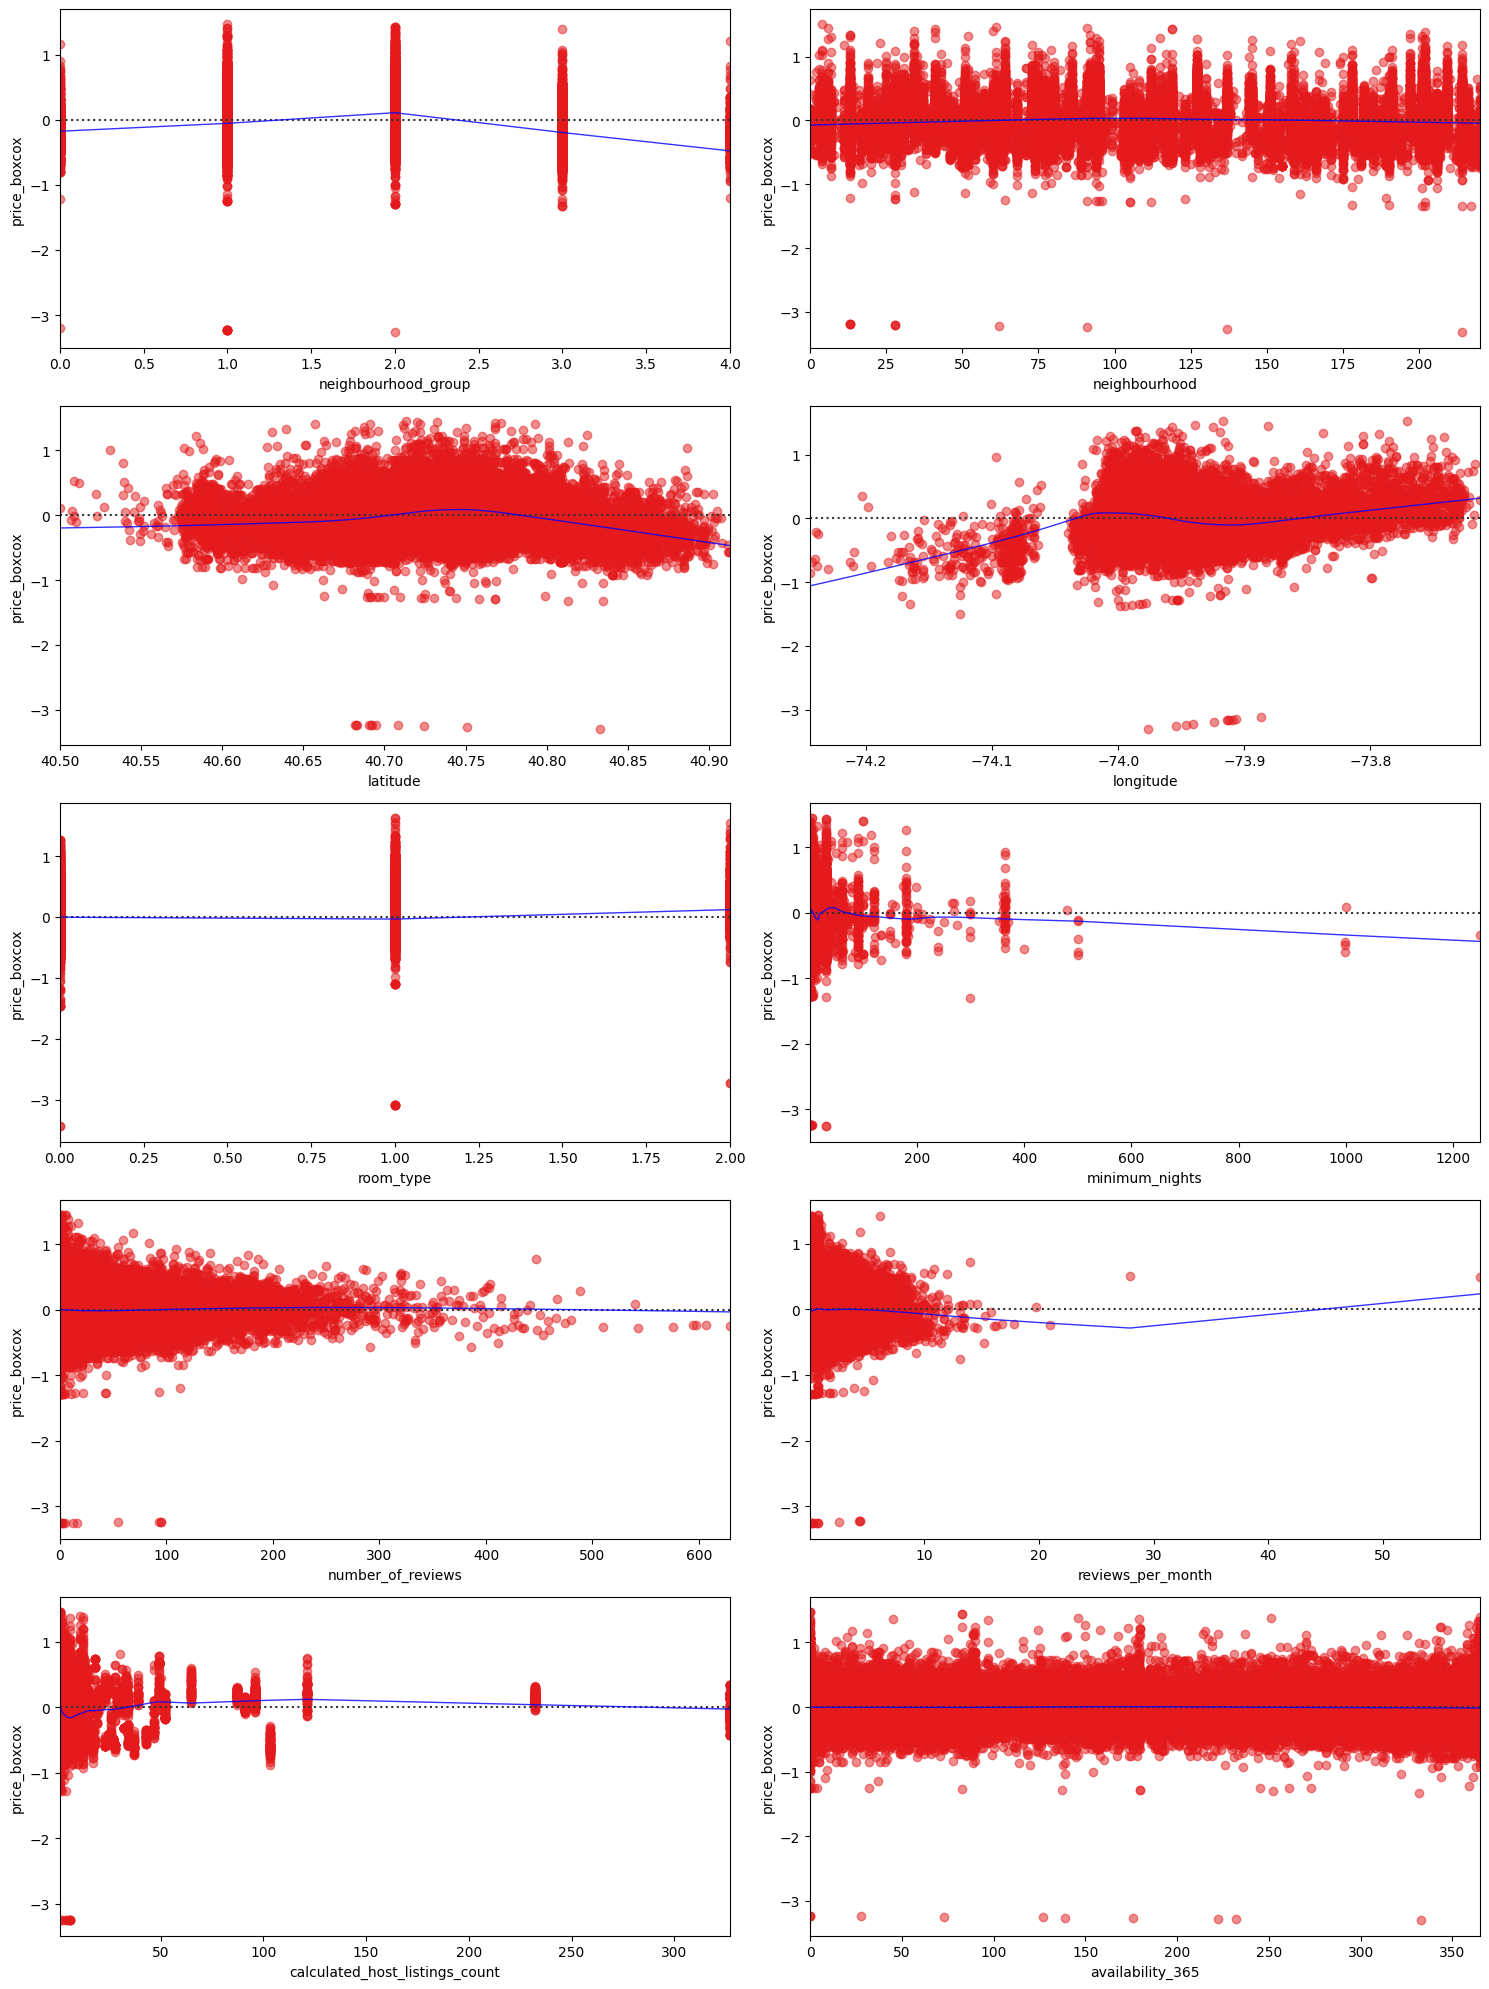

In [26]:

f, axes = plt.subplots(5, 2, figsize=(15, 20))
sns.residplot(x=nyc_model_x.iloc[:,0],y=nyc_model_y, lowess=True, ax=axes[0, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=nyc_model_x.iloc[:,1],y=nyc_model_y, lowess=True, ax=axes[0, 1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=nyc_model_x.iloc[:,2],y=nyc_model_y, lowess=True, ax=axes[1, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=nyc_model_x.iloc[:,3],y=nyc_model_y, lowess=True, ax=axes[1, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=nyc_model_x.iloc[:,4],y=nyc_model_y, lowess=True, ax=axes[2, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=nyc_model_x.iloc[:,5],y=nyc_model_y, lowess=True, ax=axes[2, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=nyc_model_x.iloc[:,6],y=nyc_model_y, lowess=True, ax=axes[3, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=nyc_model_x.iloc[:,7],y=nyc_model_y, lowess=True, ax=axes[3, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=nyc_model_x.iloc[:,8],y=nyc_model_y, lowess=True, ax=axes[4, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=nyc_model_x.iloc[:,9],y=nyc_model_y, lowess=True, ax=axes[4, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})

plt.tight_layout()
plt.show()

In [27]:
scaler = StandardScaler()
nyc_model_x = scaler.fit_transform(nyc_model_x)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(nyc_model_x, nyc_model_y, test_size=0.3,random_state=42)

Now it is time to build a ``feature importance`` graph. For this ``Extra Trees Classifier`` method will be used. In the below code, ``lowess=True`` makes sure the lowest regression line is drawn.

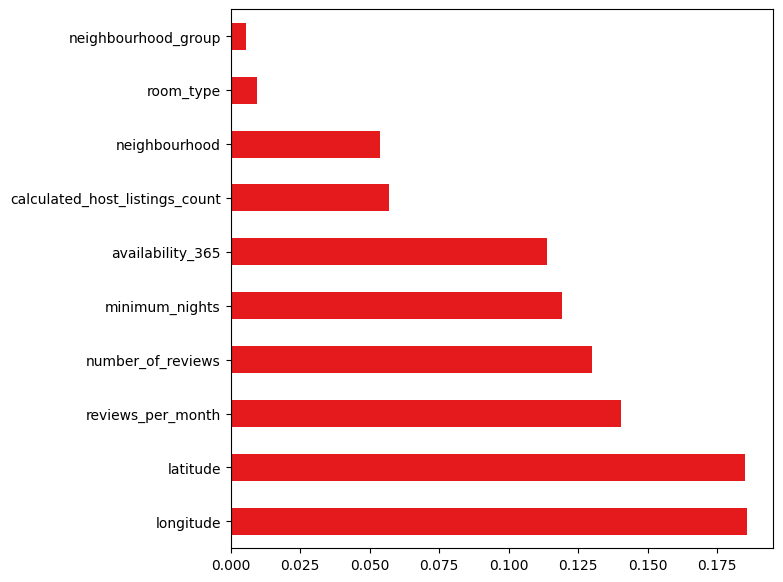

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
lab_enc = LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=nyc_model.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [30]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

#Ridge Model
ridge_model = Ridge(alpha = 0.34)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

#Lasso Model
Lasso_model = Lasso(alpha = 0.2)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test) 

#ElasticNet Model
model_enet = ElasticNet(alpha = 0.26)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)


In [31]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
#Ridge Model cv
ridge_modelcv = RidgeCV(alphas = (0.7, 4.6, 7.0, 9.0))
ridge_modelcv.fit(X_train, y_train)             
pred_ridgecv = ridge_modelcv.predict(X_test) 

#Lasso Model cv
Lasso_modelcv = LassoCV(alphas = (0.7, 4.6, 7.0, 9.0))
Lasso_modelcv.fit(X_train, y_train)
pred_Lassocv = Lasso_modelcv.predict(X_test) 

#ElasticNet Model cv
model_enetcv = ElasticNetCV(alphas = (0.7, 4.6, 7.0, 9.0))
model_enetcv.fit(X_train, y_train) 
pred_test_enetcv= model_enetcv.predict(X_test)

Text(0, 0.5, 'Predictions')

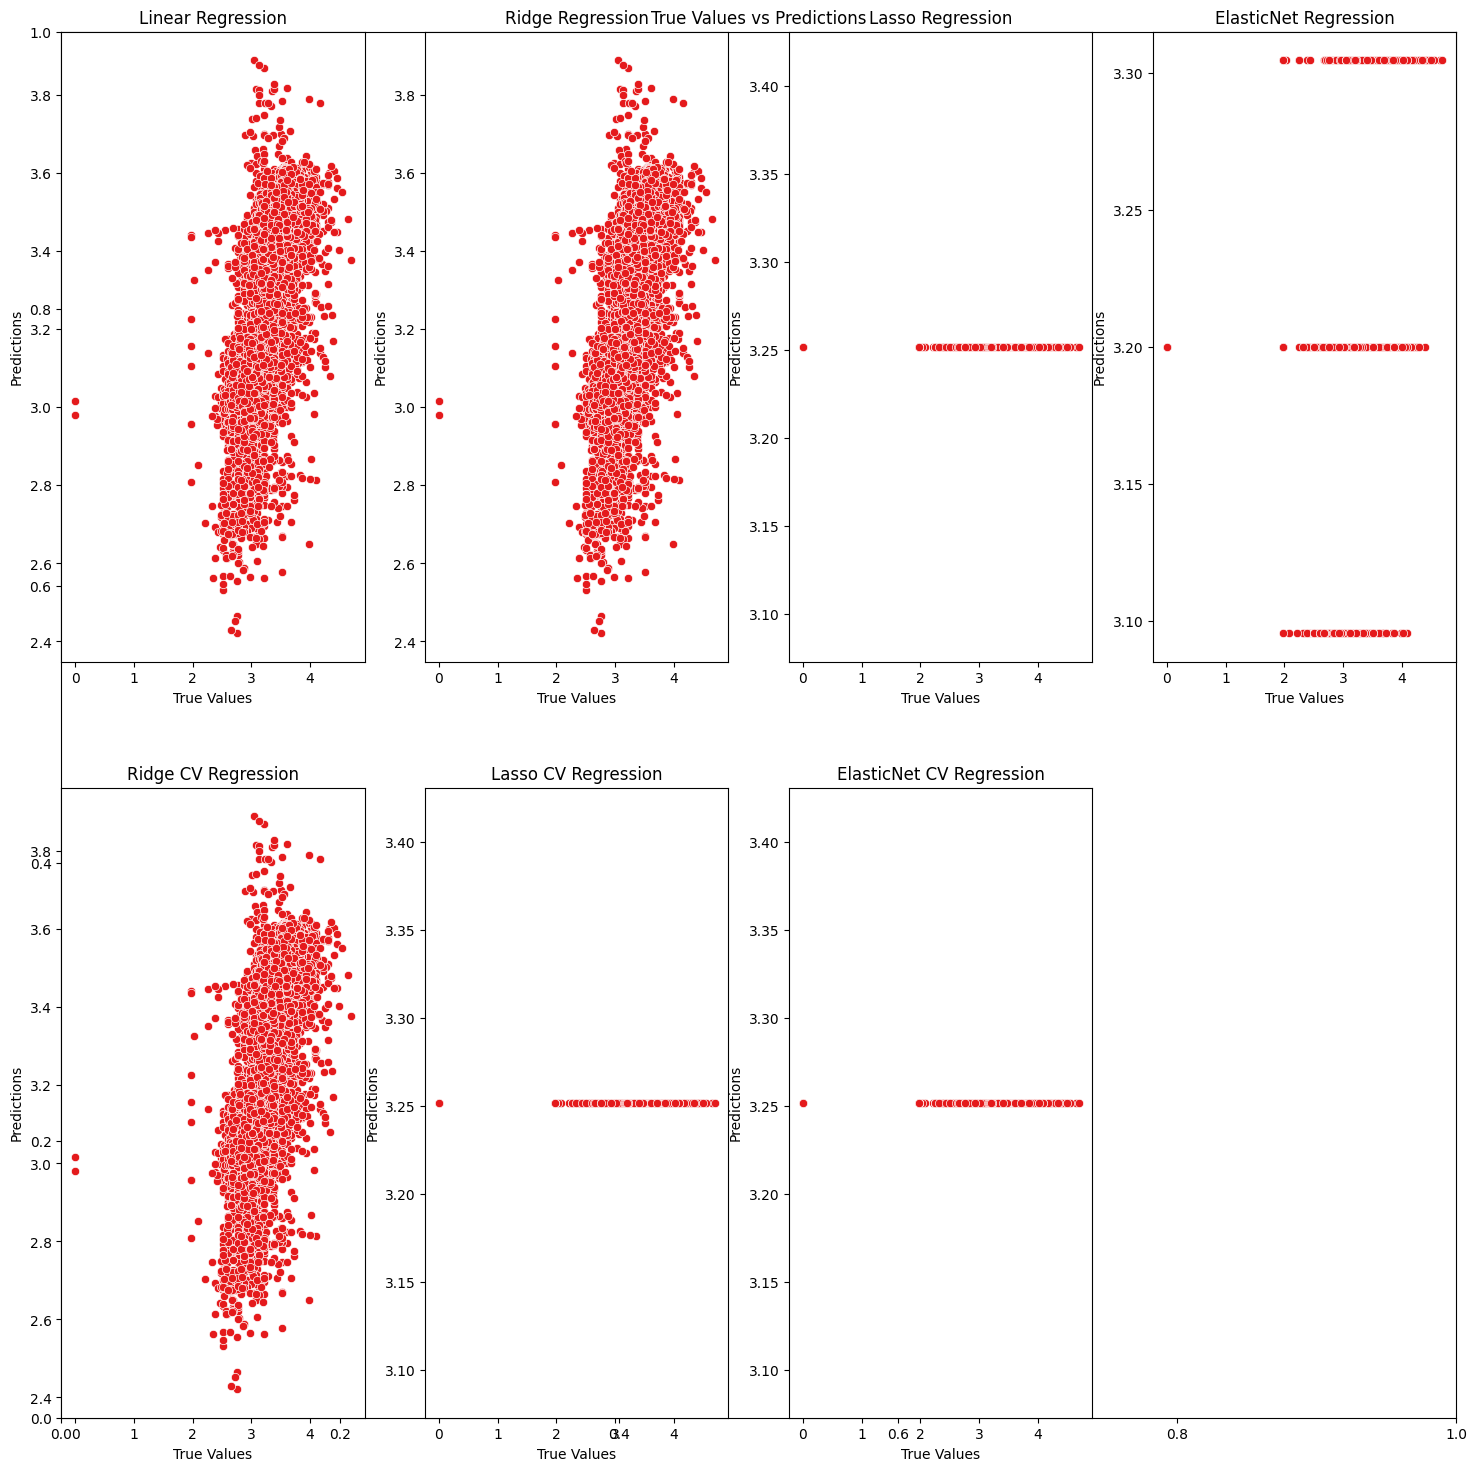

In [32]:
plt.figure(figsize=(18,18))
plt.title('True Values vs Predictions')

plt.subplot(2,4,1)
sns.scatterplot(x= y_test, y= lr_pred)
plt.title('Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(2,4,2)
sns.scatterplot(x= y_test, y= pred_ridge)
plt.title('Ridge Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(2,4,3)
sns.scatterplot(x= y_test, y= pred_Lasso)
plt.title('Lasso Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(2,4,4)
sns.scatterplot(x= y_test, y= pred_test_enet)
plt.title('ElasticNet Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')


plt.subplot(2,4,5)
sns.scatterplot(x= y_test, y= pred_ridgecv)
plt.title('Ridge CV Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(2,4,6)
sns.scatterplot(x= y_test, y= pred_Lassocv)
plt.title('Lasso CV Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(2,4,7)
sns.scatterplot(x= y_test, y= pred_test_enetcv)
plt.title('ElasticNet CV Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')



## Phase 2 - After deleting less important feature

All steps from Phase 1, will be repeated in this Phase. The difference is, ``neighbourhood_group`` and ``room_type`` features will be eliminated.

In [33]:
nyc_model_xx= nyc_model.drop(columns=['neighbourhood_group', 'room_type'])

In [34]:
nyc_model_xx, nyc_model_yx = nyc_model_xx.iloc[:,:-1], nyc_model_xx.iloc[:,-1]
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(nyc_model_xx, nyc_model_yx, test_size=0.3,random_state=42)

In [35]:
scaler = StandardScaler()
nyc_model_xx = scaler.fit_transform(nyc_model_xx)

In [36]:
###Linear Regression
lr_x = LinearRegression(copy_X= True, fit_intercept = True)
lr_x.fit(X_train_x, y_train_x)
lr_pred_x= lr_x.predict(X_test_x)

###Ridge
ridge_x = Ridge(alpha = 0.34)
ridge_x.fit(X_train_x, y_train_x)           
pred_ridge_x = ridge_x.predict(X_test_x) 

###Lasso
Lasso_x = Lasso(alpha = 0.2)
Lasso_x.fit(X_train_x, y_train_x)
pred_Lasso_x = Lasso_x.predict(X_test_x) 

##ElasticNet
model_enet_x = ElasticNet(alpha = 0.26)
model_enet_x.fit(X_train_x, y_train_x) 
pred_train_enet_x= model_enet_x.predict(X_train_x)
pred_test_enet_x= model_enet_x.predict(X_test_x)


In [37]:
###Ridge cv
ridge_xcv = RidgeCV(alphas = (0.7, 4.6, 7.0, 9.0))
ridge_xcv.fit(X_train_x, y_train_x)           
pred_ridge_xcv = ridge_xcv.predict(X_test_x) 
 
###Lasso cv
Lasso_xcv = LassoCV(alphas = (0.7, 4.6, 7.0, 9.0))
Lasso_xcv.fit(X_train_x, y_train_x)
pred_Lasso_xcv = Lasso_xcv.predict(X_test_x) 

##ElasticNet cv
model_enet_xcv = ElasticNetCV(alphas = (0.7, 4.6, 7.0, 9.0))
model_enet_xcv.fit(X_train_x, y_train_x) 
pred_train_enet_x= model_enet_xcv.predict(X_train_x)
pred_test_enet_xcv= model_enet_xcv.predict(X_test_x)

Text(0, 0.5, 'Predictions')

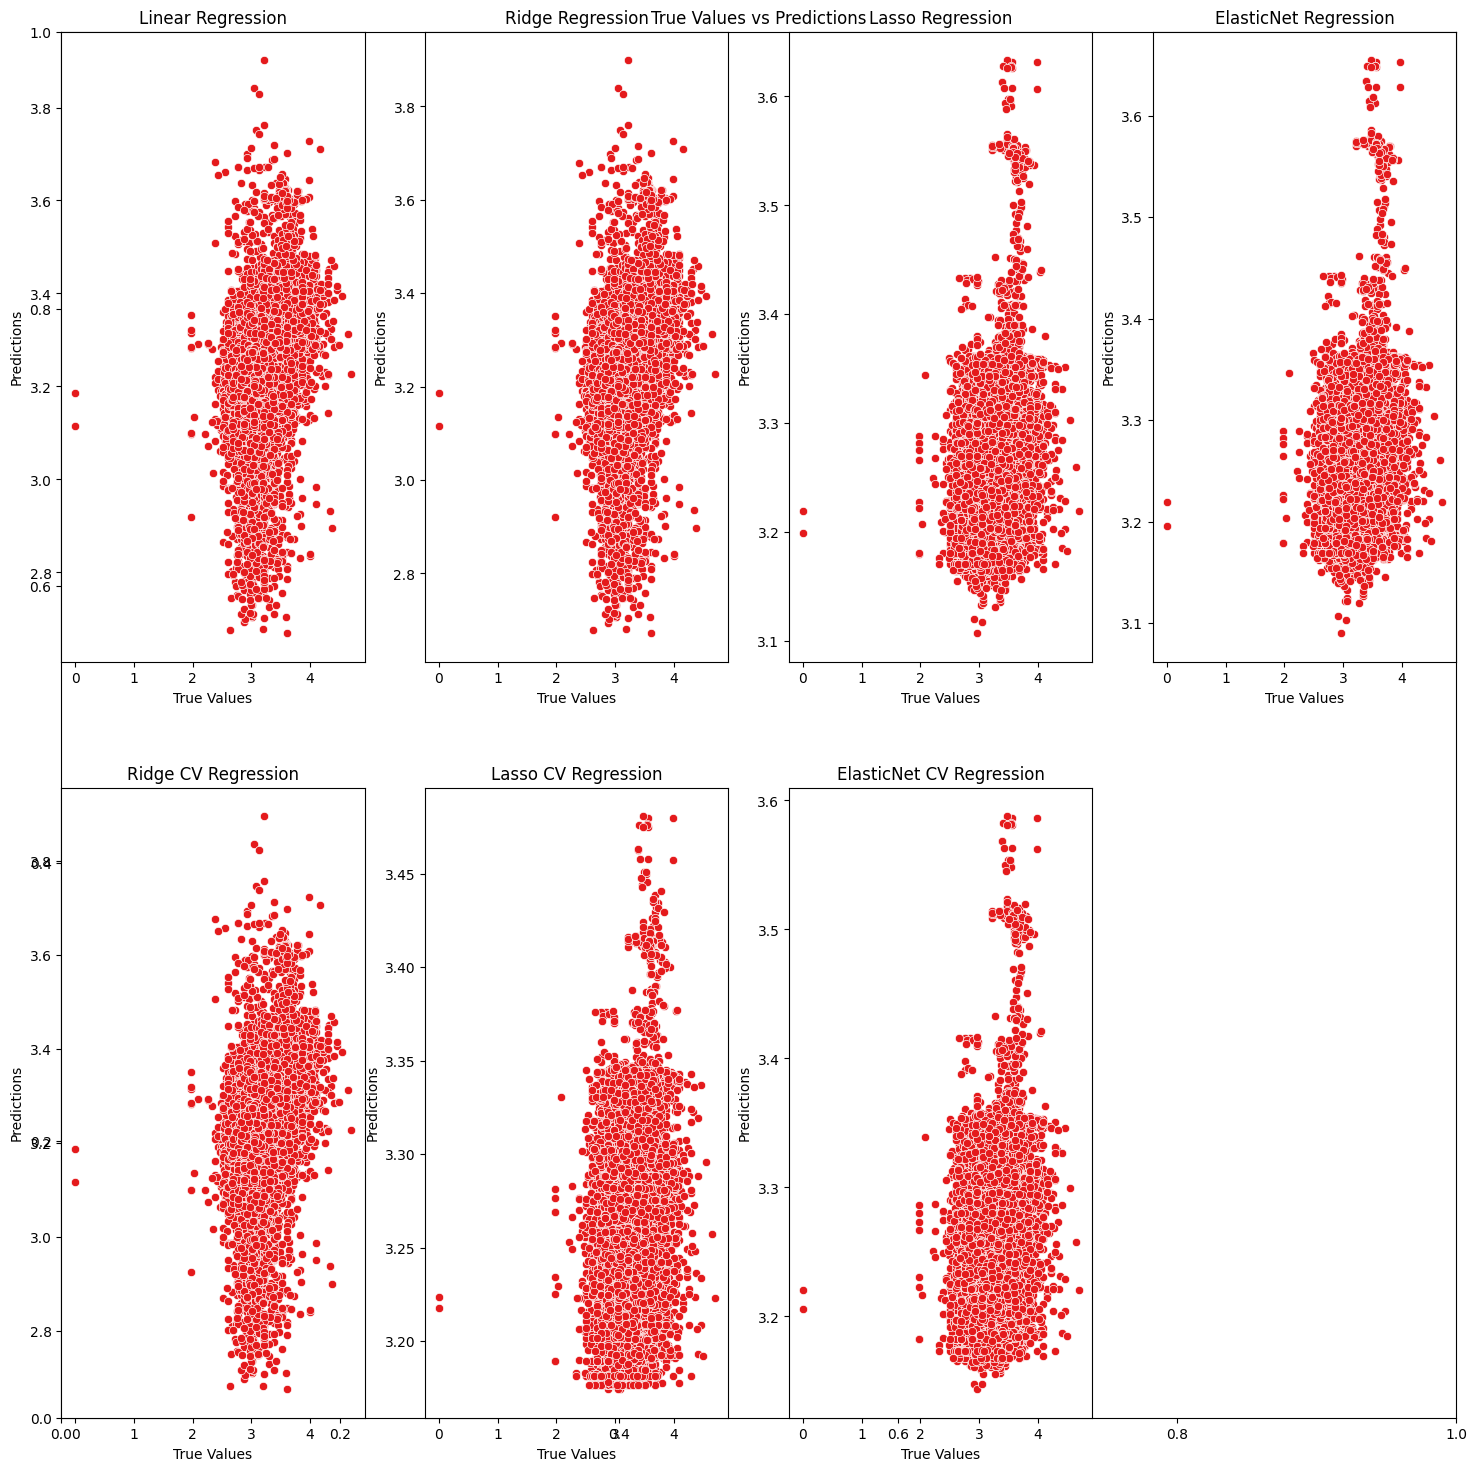

In [38]:
plt.figure(figsize=(18,18))
plt.title('True Values vs Predictions')

plt.subplot(2,4,1)
sns.scatterplot(x= y_test_x, y= lr_pred_x)
plt.title('Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(2,4,2)
sns.scatterplot(x= y_test_x, y= pred_ridge_x)
plt.title('Ridge Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(2,4,3)
sns.scatterplot(x= y_test_x, y= pred_Lasso_x)
plt.title('Lasso Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(2,4,4)
sns.scatterplot(x= y_test_x, y= pred_test_enet_x)
plt.title('ElasticNet Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')


plt.subplot(2,4,5)
sns.scatterplot(x= y_test_x, y= pred_ridge_xcv)
plt.title('Ridge CV Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(2,4,6)
sns.scatterplot(x= y_test_x, y= pred_Lasso_xcv)
plt.title('Lasso CV Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(2,4,7)
sns.scatterplot(x= y_test_x, y= pred_test_enet_xcv)
plt.title('ElasticNet CV Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')



# 4. Model Comparison
* ``Mean Absolute Error (MAE)``    shows the difference between predictions and actual values.

* ``Root Mean Square Error (RMSE)`` shows how accurately the model predicts the response.

*  ``R^2``  will be calculated to find the goodness of fit measure.

In [39]:
print('-------------Liner Regression-----------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, lr_pred_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, lr_pred_x)))   
print('R2 %f' % r2_score(y_test_x, lr_pred_x))

print('---------------Ridge ---------------------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, pred_ridge_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, pred_ridge_x)))   
print('R2 %f' % r2_score(y_test_x, pred_ridge_x))

print('---------------Lasso-----------------------')

print('--Phase-1--')
print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))

print('--Phase-2--')
print('MAE: %f' % mean_absolute_error(y_test_x, pred_Lasso_x))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x, pred_Lasso_x)))
print('R2 %f' % r2_score(y_test_x, pred_Lasso_x))

print('---------------ElasticNet-------------------')

print('--Phase-1 --')
print('MAE: %f' % mean_absolute_error(y_test,pred_test_enet)) 
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_enet))) 
print('R2 %f' % r2_score(y_test, pred_test_enet))

print('--Phase-2--')
print('MAE: %f' % mean_absolute_error(y_test_x,pred_test_enet_x))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x,pred_test_enet_x)))
print('R2 %f' % r2_score(y_test_x, pred_test_enet_x))

-------------Liner Regression-----------
--Phase-1--
MAE: 0.163014
RMSE: 0.221134
R2 0.477982
--Phase-2--
MAE: 0.222869
RMSE: 0.283560
R2 0.141650
---------------Ridge ---------------------
--Phase-1--
MAE: 0.163014
RMSE: 0.221134
R2 0.477982
--Phase-2--
MAE: 0.222888
RMSE: 0.283553
R2 0.141693
---------------Lasso-----------------------
--Phase-1--
MAE: 0.245420
RMSE: 0.306073
R2 -0.000061
--Phase-2--
MAE: 0.239363
RMSE: 0.300329
R2 0.037123
---------------ElasticNet-------------------
--Phase-1 --
MAE: 0.213783
RMSE: 0.274009
R2 0.198497
--Phase-2--
MAE: 0.239276
RMSE: 0.300308
R2 0.037256


In [40]:
print('---------------Ridge ---------------------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, pred_ridge_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, pred_ridge_x)))   
print('R2 %f' % r2_score(y_test_x, pred_ridge_x))

print('---------------Lasso-----------------------')

print('--Phase-1--')
print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))

print('--Phase-2--')
print('MAE: %f' % mean_absolute_error(y_test_x, pred_Lasso_x))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x, pred_Lasso_x)))
print('R2 %f' % r2_score(y_test_x, pred_Lasso_x))

print('---------------ElasticNet-------------------')

print('--Phase-1 --')
print('MAE: %f' % mean_absolute_error(y_test,pred_test_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_enet))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_enet))

print('--Phase-2--')
print('MAE: %f' % mean_absolute_error(y_test_x,pred_test_enet_x)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x,pred_test_enet_x))) #RMSE
print('R2 %f' % r2_score(y_test_x, pred_test_enet_x))

---------------Ridge ---------------------
--Phase-1--
MAE: 0.163014
RMSE: 0.221134
R2 0.477982
--Phase-2--
MAE: 0.222888
RMSE: 0.283553
R2 0.141693
---------------Lasso-----------------------
--Phase-1--
MAE: 0.245420
RMSE: 0.306073
R2 -0.000061
--Phase-2--
MAE: 0.239363
RMSE: 0.300329
R2 0.037123
---------------ElasticNet-------------------
--Phase-1 --
MAE: 0.213783
RMSE: 0.274009
R2 0.198497
--Phase-2--
MAE: 0.239276
RMSE: 0.300308
R2 0.037256
